# Final Results

This file includes the EDA we did on our combined data set. The resulting visualizations are what allowed us to draw conclusions about what kind of companies give more to political causes.

## Front Matter

For loading in libraries

In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import MaxAbsScaler
import matplotlib.pyplot as plt

## Combined Data Visualizations

It is interesting to note that, in some environments, the coding cell with throw an error, but will still show the image. Depending on what kind of kernel you are running, you may or may not receive the following error:<br>

`ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed`

In [13]:
dir = "data/combined_df.csv"
df = pd.read_csv(dir)

df.rename(columns = {'rank':'rank_1000'}, inplace = True)
df.drop(columns = "Unnamed: 0", inplace = True)

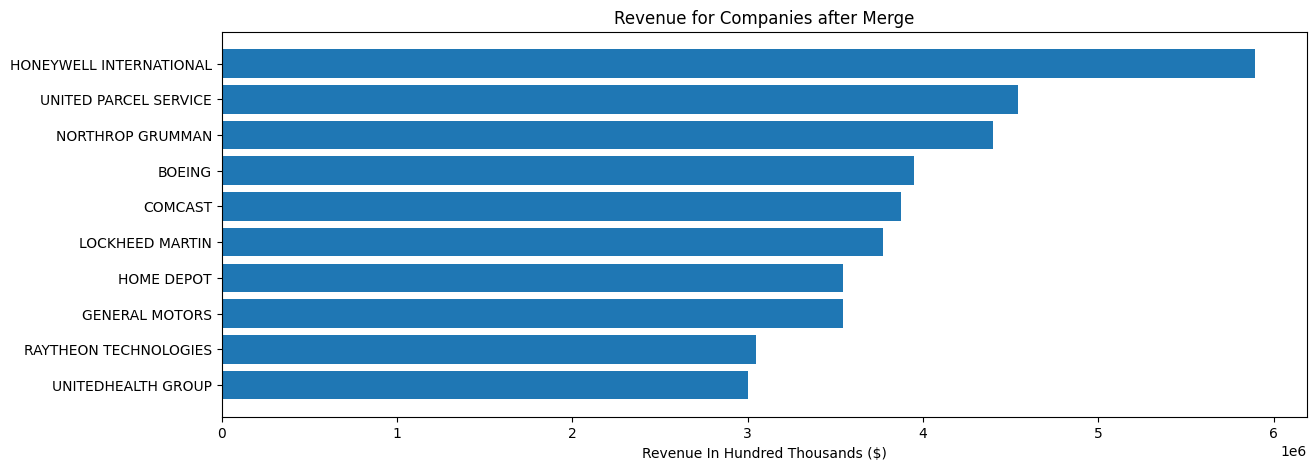

In [15]:
top_receipt = df.sort_values('amount_receipt', ascending = False).head(10).sort_values('amount_receipt')

fig = plt.figure(figsize = (14, 5))
plt.barh(top_receipt['committee'], top_receipt['amount_receipt'])
plt.xlabel("Revenue In Hundred Thousands ($)")
plt.title("Revenue for Companies after Merge")
plt.show()

In [17]:
final = df[["committee", "state", "sector", "rank_receipt", "amount_receipt", "rank_1000", "revenue"]]
final = final.dropna()

In [18]:
# Use Scikit-learn to transform with maximum absolute scaling
scaler = MaxAbsScaler()
scaler.fit(final[['amount_receipt', 'revenue']])
scaled = scaler.transform(final[['amount_receipt', 'revenue']])
scaled_df = pd.DataFrame(scaled, columns=final[['amount_receipt', 'revenue']].columns)

# final.amount_receipt = scaled_df.amount_receipt
# final.revenue = scaled_df.revenue

In [19]:
fig = px.scatter(scaled_df, x = "amount_receipt", y = "revenue", labels = dict(revenue = "Total Revenue", amount_receipt = "Amount in Receipts"))
fig.update_xaxes(range = [0,1])

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'Amount in Receipts=%{x}<br>Total Revenue=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([1.        , 0.77017894, 0.74663111, 0.66934356, 0.65718185, 0.6396292 ,
                          0.6013627 , 0.6010314 , 0.5166204 , 0.50958702, 0.49575234, 0.46729704,
                          0.43058104, 0.42282941, 0.40834112, 0.40799505, 0.35782232, 0.35184274,
                          0.33753137, 0.3371753 , 0.32584601, 0.31759887, 0.31033649, 0.29313805,
                          0.29241081, 0.27072017, 0.26476672, 0.24982498, 0.24319348, 0.24090285,
                          0.23844649, 0.23300958, 0.22914064, 0.22829346, 0.22354173, 0.22024803]),
              'xaxis': 'x',
              'y': array([0.06004672, 0.16985826, 0.06227281, 0.10874826, 0.20320242, 0.11705549,
                          0.2639126 , 0.22174267, 0.11241825, 0.50213006, 0.29482815, 0.0902342 ,
                          0.03110236, 0.30393153, 0.2420568 , 1.        , 0.02980163, 0.14658824,
                          0.14192481, 0.06716496, 0.03859598, 0.23328165, 0.04944252, 0.07520681,
                          0.21995831, 0.03685876, 0.18914228, 0.04308481, 0.05220217, 0.23804461,
                          0.18680795, 0.44982139, 0.04535804, 0.08899283, 0.51001128, 0.82028585]),
              'yaxis': 'y'}],
    'layout': {'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'range': [0, 1], 'title': {'text': 'Amount in Receipts'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Total Revenue'}}}
})

In [20]:
fig = px.histogram(final, x = "rank_1000", labels = dict(rank_1000 = "Rank in the Fortune 1000", count = "Count of Category"))
fig.update_layout(bargap=0.2)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'Rank in the Fortune 1000=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': array([105,  34, 101,  60,  28,  55,  17,  25,  58,   5,  13,  69, 206,  12,
                           20,   1, 215,  39,  43,  94, 161,  23, 122,  86,  26, 165,  30, 145,
                          113,  22,  31,   8, 140,  73,   4,   2]),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'bargap': 0.2,
               'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Rank in the Fortune 1000'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

In [21]:
top = final.head(10)
fig = px.bar(top, x = 'revenue', y = 'committee')
fig.update_yaxes(autorange="reversed")


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'revenue=%{x}<br>committee=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'h',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array([ 34392.,  97287.,  35667.,  62286., 116385.,  67044., 151157., 127004.,
                           64388., 287597.]),
              'xaxis': 'x',
              'y': array(['HONEYWELL INTERNATIONAL', 'UNITED PARCEL SERVICE', 'NORTHROP GRUMMAN',
                          'BOEING', 'COMCAST', 'LOCKHEED MARTIN', 'HOME DEPOT', 'GENERAL MOTORS',
                          'RAYTHEON TECHNOLOGIES', 'UNITEDHEALTH GROUP'], dtype=object),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'revenue'}},
               'yaxis': {'anchor': 'x', 'autorange': 'reversed', 'domain': [0.0, 1.0], 'title': {'text': 'committee'}}}
})

In [22]:
final.head()

,committee,state,sector,rank_receipt,amount_receipt,rank_1000,revenue
0,HONEYWELL INTERNATIONAL,NC,Industrials,2.0,5894895.0,105,34392.0
1,UNITED PARCEL SERVICE,GA,Transportation,3.0,4540124.0,34,97287.0
2,NORTHROP GRUMMAN,VA,Aerospace & Defense,4.0,4401312.0,101,35667.0
3,BOEING,IL,Aerospace & Defense,5.0,3945710.0,60,62286.0
4,COMCAST,PA,Telecommunications,6.0,3874018.0,28,116385.0


In [23]:
px.histogram(final, x = "state")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'bingroup': 'x',
              'hovertemplate': 'state=%{x}<br>count=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'histogram',
              'x': array(['NC', 'GA', 'VA', 'IL', 'PA', 'MD', 'GA', 'MI', 'MA', 'MN', 'TX', 'CT',
                          'FL', 'CT', 'IN', 'AR', 'FL', 'TN', 'NY', 'VA', 'GA', 'NY', 'IN', 'IL',
                          'MO', 'VA', 'TX', 'NC', 'GA', 'MI', 'TX', 'CA', 'CA', 'IL', 'RI', 'WA'],
                         dtype=object),
              'xaxis': 'x',
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'state'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'count'}}}
})

In [31]:
last = df[['rank_receipt', 'rank_1000', 'sector', 'amount_receipt', 'revenue']]
sectors = np.unique(last.sector)

px.pie(last, values = last.sector.value_counts()[:5], names = np.unique(last.sector)[:5])

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['Aerospace & Defense', 'Business Services', 'Energy', 'Financials',
                               'Food, Beverages & Tobacco'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': array([13,  9,  6,  6,  4])}],
    'layout': {'legend': {'tracegroupgap': 0}, 'margin': {'t': 60}, 'template': '...'}
})

In [33]:
last.groupby('sector')['revenue'].sum()


sector
Aerospace & Defense           285668.0
Business Services               4143.1
Energy                        237178.4
Financials                    236864.7
Food, Beverages & Tobacco      29725.9
Health Care                  1370737.2
Industrials                    99445.0
Motor Vehicles & Parts        263345.0
Retailing                    1193733.0
Technology                    443656.0
Telecommunications            470544.0
Transportation                215070.3
Name: revenue, dtype: float64

In [34]:
last.dropna()
px.pie(last, values = last.groupby('sector')['amount_receipt'].sum()[:5], names = np.unique(last.sector)[:5])

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['Aerospace & Defense', 'Business Services', 'Energy', 'Financials',
                               'Food, Beverages & Tobacco'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': array([19688835.,        0.,  5142789.,  1920828.,  1595867.])}],
    'layout': {'legend': {'tracegroupgap': 0}, 'margin': {'t': 60}, 'template': '...'}
})

## Map Visualizations

Similar to the note above in the last markdown cell, the following code throws out an error. In addition, it may also say that the resulting visualization exceeds the size limit. The solution to this would be to find a different kernel or to use a different environment like Google Colabs on which this file was originally run.

In [35]:
fig = px.choropleth(df,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='amount_receipt',
                    color_continuous_scale="Viridis_r",
                    range_color=(1000000, 4000000)               
                    )
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
fig = px.choropleth(combined_df,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='amount_committee',
                    color_continuous_scale="Viridis_r",
                    range_color=(1000000, 4000000)               
                    )
fig.show()

In [ ]:
fig = px.choropleth(combined_df,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='amount_cash_on_hand',
                    color_continuous_scale="Viridis_r",
                    range_color=(500000, 3000000)               
                    )
fig.show()

In [ ]:
fig = px.choropleth(combined_df,
                    locations='state', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='amount_disbursement',
                    color_continuous_scale="Viridis_r",
                    range_color=(1000000, 3500000)               
                    )
fig.show()

# Finish

That concludes the content of our final project for DS 320.